# Une première classification 



0. Importez les librairies usuelles

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import files
uploaded = files.upload()

1. Téléchargez les données du dataset : ```ex2data1.txt``` et insérez les dans un dataframe 

In [0]:
data = pd.read_csv('/content/ex2data1.txt', header=None)
#dataset = pd.DataFrame(data=data)
data.head()
#dataset.shape

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


2. Renommez respectivement les colonnes : 

"Col_1" / "Col_2" / "Target"

In [0]:
data = data.rename(columns= {0: "Col_1",
                        1: "Col_2",
                        2: "Target"}
                        )

dataset.head()

,Col_1,Col_2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


3. Visualisez les données sous la forme d’un nuage de point où les différentes classes sont indiquées par différents symboles

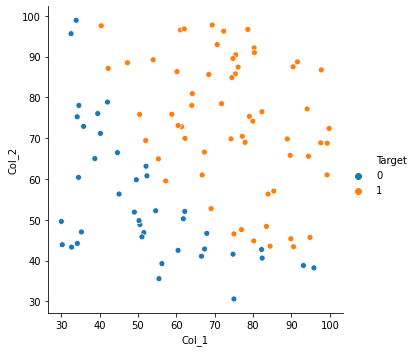

In [0]:
sns.relplot(x=data.columns[0], 
            y=data.columns[1], 
            hue=data.columns[-1], 
            data=data)

4. Séparez votre dataset en X pour les variables explicatives et y pour la variable cible 

In [0]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

5. Séparez les données en échantillon d’apprentissage et échantillon de validation grâce à la commande `from sklearn.model_selection import train_test_split`

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    stratify = y , ## Statify conserve les proportions
                                                    random_state = 42)

6. Analysez les variables explicatives, y a t’il besoin de les normaliser ? si oui utiliser la fonction vue précédemment pour centrer réduire les variables explicatives.

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test) ### PAS de fit sur le X_test

7. Utilisez la régression logistique pour classer les données à votre disposition

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

8. Regardez votre score sur votre échantillon de test 

In [0]:
classifier.score(X_test, y_test)

0.95

In [0]:
y_test

99    1
48    1
4     1
31    1
32    0
89    0
17    0
73    1
38    0
44    0
61    0
15    1
41    0
37    1
23    0
87    1
7     1
51    1
24    1
49    1
Name: Target, dtype: int64

9. Regardez votre score moyen sur une cross-validation avec K=10

In [0]:
X

,Col_1,Col_2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


In [0]:
y

0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: Target, Length: 100, dtype: int64

In [0]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier,X, y, cv=10).mean()

0.89

10. Produisez les prédictions de votre modèle pour l’echantillon d’apprentissage et l’échantillon test

In [0]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1])

11. Produisez la matrice de confusion pour vos prédictions sur l’échantillon de test et d’apprentissage, que dites vous des performances de votre modèle et son pouvoir de généralisation?

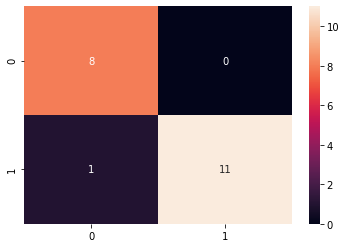

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

12. Afficher la courbe ROC de votre modèle pour les données de validation

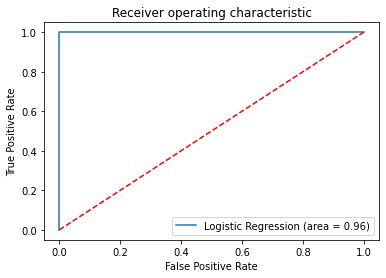

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
df = pd.DataFrame(X_train)

In [0]:
df["proba"] = classifier.predict_proba(df)[:,1]

In [0]:
df["y"] = y_train.values*1

In [0]:
df.sort_values(by="proba", ascending=False)

,0,1,proba,y
47,1.616330,1.097413,0.998408,1
43,1.248701,1.139486,0.996786,1
12,0.655663,1.631810,0.995509,1
26,1.719557,0.323877,0.994534,1
50,0.738202,1.387693,0.994042,1
...,...,...,...,...
8,-1.558775,-0.321138,0.047573,0
45,-0.506668,-1.658564,0.036440,0
59,-1.782960,-0.903145,0.010241,0
44,-1.649222,-1.241779,0.007217,0


In [0]:
df_hard = df[df.proba>0.54]
df_easy = df[df.proba<=0.54]

In [0]:
model_easy = LogisticRegression()
model_hard = LogisticRegression()

In [0]:
model_easy.fit(df_easy.iloc[:,:2], df_easy.iloc[:,3])
model_hard.fit(df_hard.iloc[:,:2], df_hard.iloc[:,3])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
df_test = pd.DataFrame(X_test)
df_test["proba"] = classifier.predict_proba(df_test)

ValueError: ignored